# Project Name- Employee Performance Analysis

# Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder, StandardScaler 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
warnings.filterwarnings('ignore')


# Load the data

In [3]:
# Importing the excel file
data=pd.read_excel('INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')

# Print the first 5 rows of data

In [4]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Get the number of rows and columns

In [5]:
data.shape

(1200, 28)

In [6]:
data.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

# Get the data types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
EmpNumber                       1200 non-null object
Age                             1200 non-null int64
Gender                          1200 non-null object
EducationBackground             1200 non-null object
MaritalStatus                   1200 non-null object
EmpDepartment                   1200 non-null object
EmpJobRole                      1200 non-null object
BusinessTravelFrequency         1200 non-null object
DistanceFromHome                1200 non-null int64
EmpEducationLevel               1200 non-null int64
EmpEnvironmentSatisfaction      1200 non-null int64
EmpHourlyRate                   1200 non-null int64
EmpJobInvolvement               1200 non-null int64
EmpJobLevel                     1200 non-null int64
EmpJobSatisfaction              1200 non-null int64
NumCompaniesWorked              1200 non-null int64
OverTime                        1200 non-null object
E

# Check for any missing Values

In [8]:
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

# View some statistics

In [9]:
data.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


In [10]:
data.EmpDepartment.unique()

array(['Sales', 'Human Resources', 'Development', 'Data Science',
       'Research & Development', 'Finance'], dtype=object)

# Analysis of Department wise Perfomance

In [11]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept = data.iloc[:,[5,27]].copy()
dept_per = dept.copy()

In [12]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept_per.groupby(by='EmpDepartment')['PerformanceRating'].mean()

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64

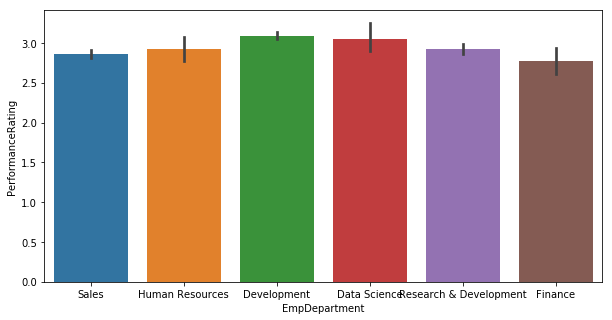

In [13]:
plt.figure(figsize=(10,5))
sb.barplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])

In [14]:
# Analyze each department separately
dept_per.groupby('EmpDepartment')['PerformanceRating'].value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: PerformanceRating, dtype: int64

In [15]:
# Creating a new dataframe to analyze each department separately
department = pd.get_dummies(dept_per['EmpDepartment'])
performance = pd.DataFrame(dept_per['PerformanceRating'])
dept_rating = pd.concat([department,performance],axis=1)

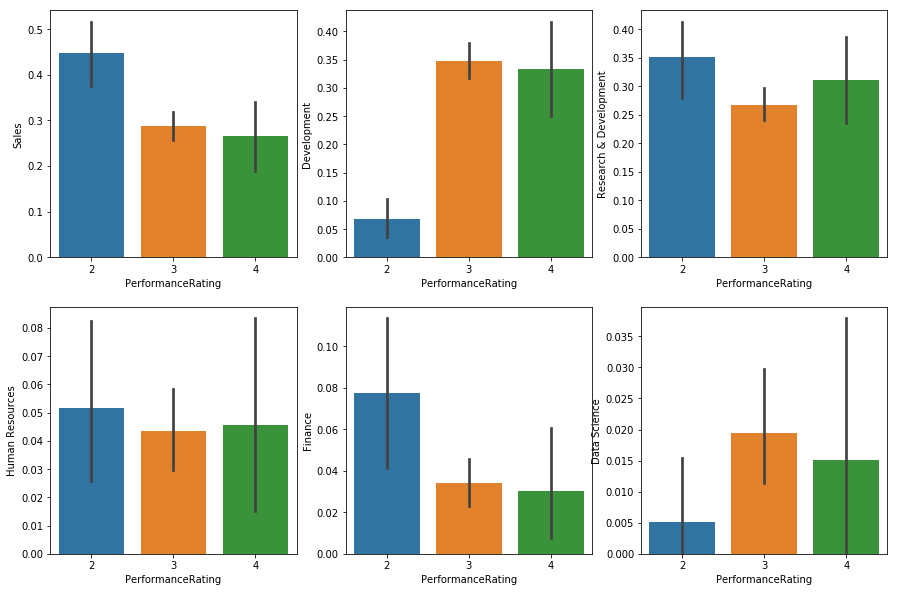

In [16]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Sales'])
plt.subplot(2,3,2)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Development'])
plt.subplot(2,3,3)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Research & Development'])
plt.subplot(2,3,4)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Human Resources'])
plt.subplot(2,3,5)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Finance'])
plt.subplot(2,3,6)
sb.barplot(dept_rating['PerformanceRating'],dept_rating['Data Science'])
plt.show()

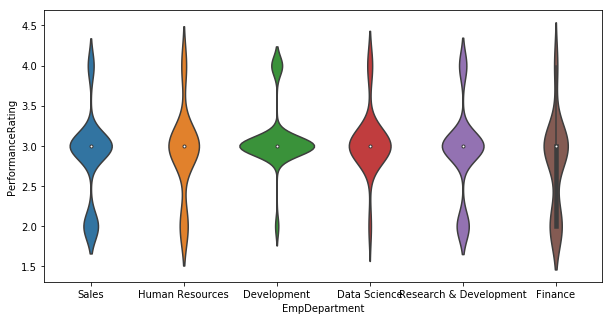

In [17]:
# Plotting a violin plot for performance of each department using seaborn
plt.figure(figsize=(10,5))
sb.violinplot(dept_per['EmpDepartment'],dept_per['PerformanceRating'])
plt.show()

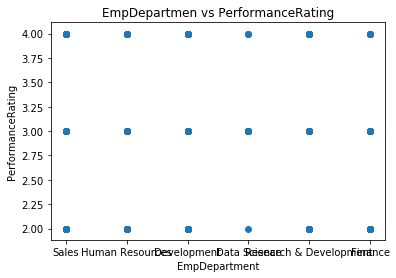

In [18]:
# Plotting a scatter plot for performance of each department 
plt.scatter(x=data.EmpDepartment,y=data.PerformanceRating)
plt.xlabel("EmpDepartment")
plt.ylabel("PerformanceRating")
plt.title("EmpDepartmen vs PerformanceRating")
plt.show()

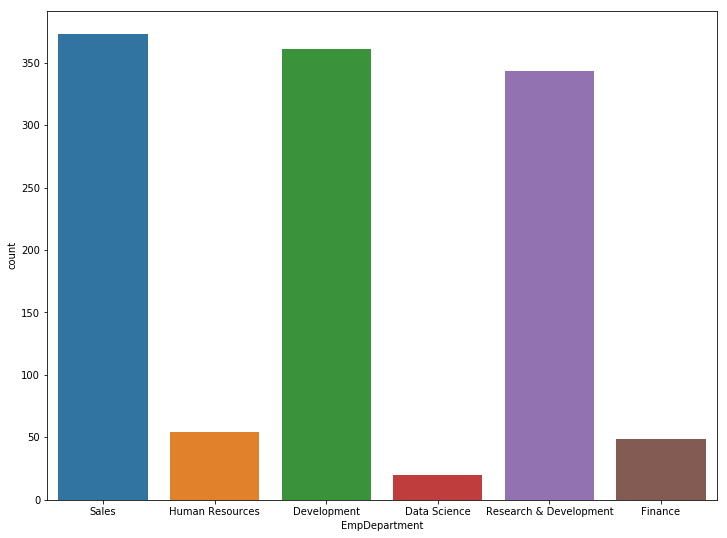

In [19]:
plt.figure(figsize=(12,9))
sb.countplot('EmpDepartment', data=data)
plt.show()

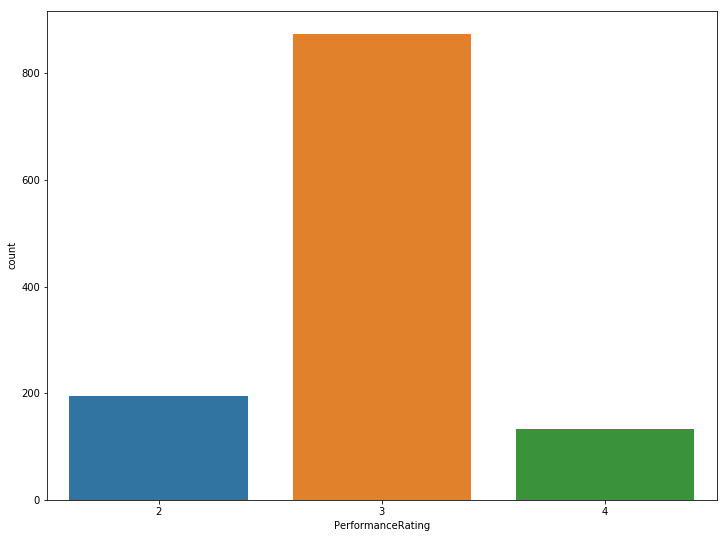

In [20]:
plt.figure(figsize=(12,9))
sb.countplot('PerformanceRating', data=data)

In [21]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,...,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,...,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,...,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,...,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,...,4,10,1,3,2,2,2,2,No,3


# Data Processing

In [22]:
#Transfer the data from non-numerical to numerical
a=LabelEncoder()

In [23]:
data.EmpNumber=a.fit_transform(data.EmpNumber)
data.Gender=a.fit_transform(data.Gender)
data.MaritalStatus=a.fit_transform(data.MaritalStatus)
data.EmpDepartment=a.fit_transform(data.EmpDepartment)
data.EmpJobRole=a.fit_transform(data.EmpJobRole)
data.BusinessTravelFrequency=a.fit_transform(data.BusinessTravelFrequency)
data.Attrition=a.fit_transform(data.Attrition)
data.EducationBackground=a.fit_transform(data.EducationBackground)
data.OverTime=a.fit_transform(data.OverTime)


In [24]:
data.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,...,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,...,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,...,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,...,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,...,4,10,1,3,2,2,2,2,0,3


# Finding out the correlation coeffecient to find out which predictors are significant.

In [25]:
data.corr()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,...,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
EmpNumber,1.000000,-0.053137,0.025922,0.023819,-0.038128,-0.234279,-0.044182,0.050270,-0.023405,0.005844,...,0.033013,-0.008414,0.020264,0.006075,-0.005061,0.002596,0.004240,0.010905,-0.020210,-0.003163
Age,-0.053137,1.000000,-0.040107,-0.055905,-0.098368,-0.000104,-0.037665,0.040579,0.020937,0.207313,...,0.049749,0.680886,-0.016053,-0.019563,0.318852,0.217163,0.228199,0.205098,-0.189317,-0.040164
Gender,0.025922,-0.040107,1.000000,0.009922,-0.042169,-0.010925,0.011332,-0.043608,-0.001507,-0.022960,...,0.030707,-0.061055,-0.057654,0.015793,-0.030392,-0.031823,-0.021575,-0.036643,0.035758,-0.001780
EducationBackground,0.023819,-0.055905,0.009922,1.000000,-0.001097,-0.026874,-0.012325,0.012382,-0.013919,-0.047978,...,0.005652,-0.027929,0.051596,0.022890,-0.009887,-0.003215,0.014277,0.002767,0.027161,0.005607
MaritalStatus,-0.038128,-0.098368,-0.042169,-0.001097,1.000000,0.067272,0.038023,0.028520,-0.019148,0.026737,...,0.026410,-0.093537,0.026045,0.014154,-0.075728,-0.076663,-0.052951,-0.061908,0.162969,0.024172
EmpDepartment,-0.234279,-0.000104,-0.010925,-0.026874,0.067272,1.000000,0.568973,-0.045233,0.007707,0.019175,...,-0.050286,0.016065,0.016438,0.068875,0.047677,0.069602,0.052315,0.033850,0.048006,-0.162615
EmpJobRole,-0.044182,-0.037665,0.011332,-0.012325,0.038023,0.568973,1.000000,-0.086251,0.022939,-0.016792,...,-0.043067,-0.049529,0.004452,-0.007519,-0.009047,0.019383,0.012190,-0.004504,0.037508,-0.096209
BusinessTravelFrequency,0.050270,0.040579,-0.043608,0.012382,0.028520,-0.045233,-0.086251,1.000000,-0.020935,0.002064,...,-0.032705,0.042736,0.006720,-0.040969,-0.015029,-0.006541,-0.020824,-0.028073,0.007217,-0.031025
DistanceFromHome,-0.023405,0.020937,-0.001507,-0.013919,-0.019148,0.007707,0.022939,-0.020935,1.000000,0.045856,...,-0.009509,0.027306,-0.032082,-0.044788,0.021908,0.019898,0.013246,0.017860,0.063248,-0.046142
EmpEducationLevel,0.005844,0.207313,-0.022960,-0.047978,0.026737,0.019175,-0.016792,0.002064,0.045856,1.000000,...,-0.016690,0.151062,-0.013674,0.010276,0.076332,0.066672,0.054313,0.088988,-0.049118,0.020529


# visualize the co-relation

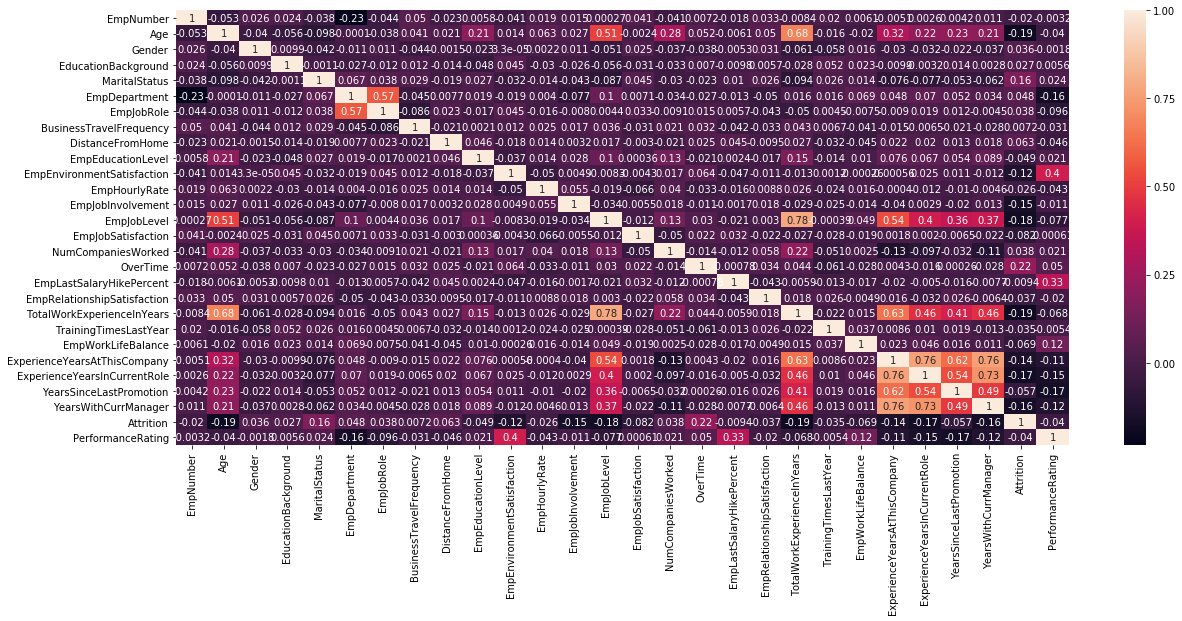

In [26]:
plt.figure(figsize=(20,8))
sb.heatmap(data.corr(),annot=True)
plt.show()

In [27]:
data.corr().PerformanceRating

EmpNumber                      -0.003163
Age                            -0.040164
Gender                         -0.001780
EducationBackground             0.005607
MaritalStatus                   0.024172
EmpDepartment                  -0.162615
EmpJobRole                     -0.096209
BusinessTravelFrequency        -0.031025
DistanceFromHome               -0.046142
EmpEducationLevel               0.020529
EmpEnvironmentSatisfaction      0.395561
EmpHourlyRate                  -0.043116
EmpJobInvolvement              -0.010539
EmpJobLevel                    -0.076632
EmpJobSatisfaction              0.000606
NumCompaniesWorked              0.020980
OverTime                        0.050206
EmpLastSalaryHikePercent        0.333722
EmpRelationshipSatisfaction    -0.019502
TotalWorkExperienceInYears     -0.068141
TrainingTimesLastYear          -0.005443
EmpWorkLifeBalance              0.124429
ExperienceYearsAtThisCompany   -0.111645
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPr

# Feature Selection
There are a lot of columns in the predictor variable. So, the correlation coeffecient is calculated to see which of them are important and these are then used for training methods. From there, we also get the top factors which affect performance. We can see that the most important features selectd were Employee Environment Satisfaction, Employee Last Salary Hike Percent, Employee Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, Years With Current Manager. These were selected because their correlation coeffecient with Performance Rating was more than 0.1.
Standardization and Label Encoding was also used for feature transformation.


 # Top 3 factors which affect the employee performance are
 
1.Employee Environment Satisfaction

2.Employee Last Salary Hike Percent

3.Employee Work Life Balance

In [28]:
# Here input factor are  EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent,EmpWorkLifeBalance
x=data.loc[:,['EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','EmpWorkLifeBalance',]]
y=data.loc[:,['PerformanceRating']]

# Splitting into train and test for calculating the accuracy

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=90)

In [30]:
# Standardization technique is used
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [31]:
x_train.shape

(900, 3)

In [32]:
x_test.shape

(300, 3)

# PCA was used, it resulted in decline of accuracy.

from sklearn.decomposition import PCA

pca=PCA(n_components=None)

x_train=pca.fit_transform(x_train)

x_test=pca.transform(x_test)

pca.explained_variance_ratio_

# Models

# Use RandomForestClassifier


In [33]:
from sklearn.ensemble import RandomForestClassifier

In [34]:
# Training the model
model=RandomForestClassifier()

In [35]:
model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
# Predicting the model
y_predict=model.predict(x_test)

In [37]:
# Finding accuracy score
accuracy_score(y_test,y_predict)*100

81.0

 # A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees

In [38]:
x= data.iloc[:,1:-1]  #All predictors were selected it resulted in dropping of accuracy.
y=data.PerformanceRating

In [39]:
# Splitting into train and test for calculating accuracy 
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99)

# Use LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Training the model
model1=LogisticRegression()

In [42]:
model1.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
# Predicting the model
y_predict=model1.predict(x_test)

In [44]:
# Finding accuracy score
accuracy_score(y_test,y_predict)*100

79.0

# Use KNeighborsClassifier

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
# Training the model
model2=KNeighborsClassifier()

In [47]:
model2.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
# Predicting the model
y_predict=model2.predict(x_test)

In [49]:
# Finding the accuracy score 
accuracy_score(y_test,y_predict)*100

67.0

# Use DecisionTreeClassifier

In [50]:
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Training the model
model3=DecisionTreeClassifier()

In [52]:
model3.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
# Predicting the model
y_predict=model3.predict(x_test)

In [54]:
# Finding the accuracy score
accuracy_score(y_test,y_predict)*100

90.33333333333333

# Conclusion

I have used algorithms like Random Forest, Logistic Regression, K-Nearest Neighbor and Decision Tree Classifier to calculate the accuracy and found out that Decision Tree Classifier gives the maximum accuracy of 90.33%.

# Recommendation

From the results, we can conclude that the company should provide a better environment as it increases the performance drastically. The company should increase the salary of the employee from time to time and help them maintain a worklife balance. On the other hand, shuffling the manager from time to time will also affect performance.